# Fashion Retail Data Analytics
## David Fischanger

In [19]:
#Importing the basic librarires
!pip install statsmodels

import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from statsmodels.formula import api
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

### Step 1: Import Dataset

In [20]:
# Importing the dataset with semicolon separator
df = pd.read_csv('pinterest-fashion-dataset.csv', sep=',')

display(df.head())

original_df = df.copy(deep=True)

print('\n\033[1mResponse:\033[0m The Dataset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))


,user_name,age,gender,location,category,brand,price in $,click_rate,availability,ratings,image_url,image_description
0,Customer_1,63,Male,Wollongong,Shoes,Converse,66.5,164,Available,5,http://i.pinimg.com/400x/88/70/b0/8870b0d38413...,These are white canvas lace-up sneakers with ...
1,Customer_2,63,Male,Wollongong,Shoes,Adidas,93.1,459,Available,2,http://i.pinimg.com/400x/c3/1d/1e/c31d1e4b326c...,These are women's wedge sandals with a black ...
2,Customer_3,63,Male,Wollongong,Shoes,Fila,66.5,402,Out of Stock,1,http://i.pinimg.com/400x/48/a5/ab/48a5abadc1ce...,A pair of checkerboard slip-on shoes from Van...
3,Customer_4,63,Male,Wollongong,Shoes,Vans,66.5,209,Available,3,http://i.pinimg.com/400x/89/4e/76/894e763a9fe3...,"These are white leather mules with a unique, ..."
4,Customer_5,63,Male,Wollongong,Shoes,Reebok,66.5,455,Available,3,http://i.pinimg.com/400x/61/94/55/619455144ff4...,These white leather slingback shoes are perfe...



Response: The Dataset consists of 12 features & 1000 samples.


### Check Datatypes

In [21]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_name          1000 non-null   object 
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   object 
 3   location           1000 non-null   object 
 4   category           1000 non-null   object 
 5   brand              1000 non-null   object 
 6   price in $         1000 non-null   float64
 7   click_rate         1000 non-null   int64  
 8   availability       1000 non-null   object 
 9   ratings            1000 non-null   int64  
 10  image_url          1000 non-null   object 
 11  image_description  995 non-null    object 
dtypes: float64(1), int64(3), object(8)
memory usage: 93.9+ KB


In [22]:
#Checking number of unique rows in each feature

df.nunique().sort_values()

gender                  2
availability            2
ratings                 5
user_name              10
category               10
location               42
age                    47
brand                  97
price in $            365
click_rate            368
image_description     990
image_url            1000
dtype: int64

In [23]:
# Checking number of unique rows in each feature
features = df.columns  # assuming you want to check for all features in the dataframe
nu = df[features].nunique().sort_values()
nf = []  # numerical features
cf = []  # categorical features
nnf = 0  # count of numerical features
ncf = 0  # count of categorical features

for i in range(df[features].shape[1]):
    if nu.values[i] <= 45:
        cf.append(nu.index[i])
    else:
        nf.append(nu.index[i])

print('\n\033[1mResponse:\033[0m The Dataset has {} numerical & {} categorical features.'.format(len(nf), len(cf)))



Response: The Dataset has 6 numerical & 6 categorical features.


In [24]:
#Checking the stats of all the columns

display(df.describe())

,age,price in $,click_rate,ratings
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.020000,59.903500,296.557000,3.023000
std,18.920824,34.059239,115.371623,1.406574
min,20.000000,18.000000,100.000000,1.000000
25%,31.750000,35.237500,198.750000,2.000000
50%,52.000000,50.000000,289.500000,3.000000
75%,66.000000,73.000000,394.000000,4.000000
max,79.000000,200.000000,500.000000,5.000000


### Step 2: Data Cleaning

In [25]:
# 1. split Gender column in logical columns
# Creating dummy variables for 'gender'
gender_dummies = pd.get_dummies(df['gender'])

# Linking the new columns with the original data frame
df = pd.concat([df, gender_dummies], axis=1)

# Renaming columns for clarity
df.rename(columns={'Male': 'gender_male', 'Female': 'gender_female'}, inplace=True)

# dropping the original 'Gender' column as it's no longer needed
# df.drop(['gender'], axis=1, inplace=True)


In [26]:
# 2. Extracting the different product categories from 'category'
# Creating 0/1 variables for each category
category_dummies = pd.get_dummies(df['category'])

# Linking the new columns to the original dataframe
df = pd.concat([df, category_dummies], axis=1)

# dropping the original 'category' column as it's no longer needed
# df.drop(['category'], axis=1, inplace=True)

In [27]:
# Creating a copy of the dataframe for future use
original_df = df.copy(deep=True)

# Displaying the first few rows of the modified dataframe
df.head()

,user_name,age,gender,location,category,brand,price in $,click_rate,availability,ratings,...,Coats & Jackets,Earrings,"Handbags, Wallets & Cases",Necklaces,Pants,Shirts & Tops,Shoes,Shorts,Skirts,Sunglasses
0,Customer_1,63,Male,Wollongong,Shoes,Converse,66.5,164,Available,5,...,False,False,False,False,False,False,True,False,False,False
1,Customer_2,63,Male,Wollongong,Shoes,Adidas,93.1,459,Available,2,...,False,False,False,False,False,False,True,False,False,False
2,Customer_3,63,Male,Wollongong,Shoes,Fila,66.5,402,Out of Stock,1,...,False,False,False,False,False,False,True,False,False,False
3,Customer_4,63,Male,Wollongong,Shoes,Vans,66.5,209,Available,3,...,False,False,False,False,False,False,True,False,False,False
4,Customer_5,63,Male,Wollongong,Shoes,Reebok,66.5,455,Available,3,...,False,False,False,False,False,False,True,False,False,False


# Cluster Analysis
Investigation of relationships between price, click-through rate, and ratings. Analyze basic statistics for numerical and catogorical features.

In [28]:
# Step 1: Use 'price in $' and 'click_rate' for clustering
price_click_data = df[['price in $', 'click_rate']]

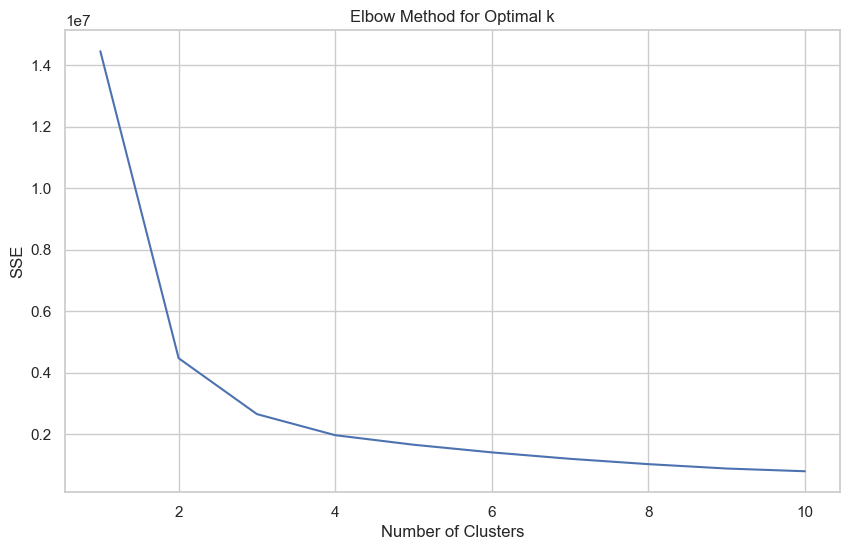

In [29]:
# Step 2: Perform clustering on the price vs. click-rate data
# Determine the optimal number of clusters (k) using the Elbow method
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(price_click_data)
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Elbow Method for Optimal k")
plt.show()

# Using the elbow point at 2 clusters linked to Plot
kmeans = KMeans(n_clusters=2, max_iter=1000)
df['Cluster'] = kmeans.fit_predict(price_click_data)

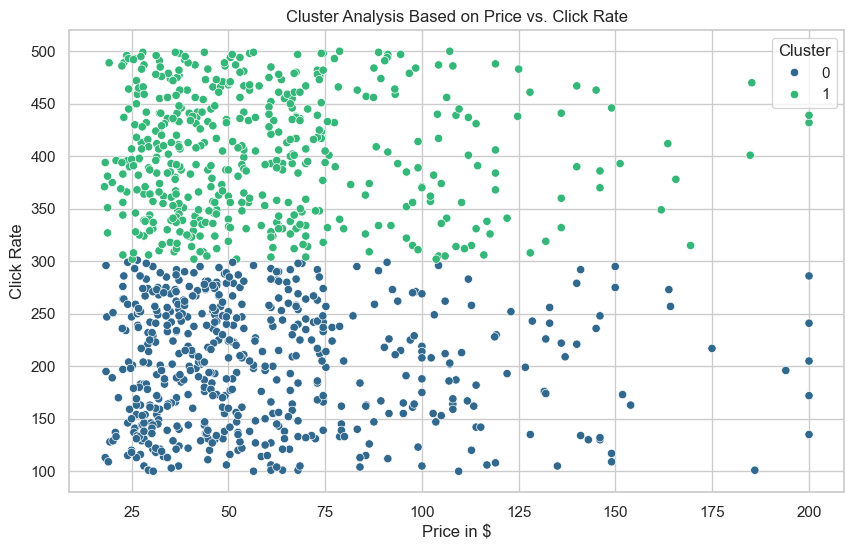

In [30]:
# Step 3: Plotting the clusters
sns.scatterplot(x='price in $', y='click_rate', hue='Cluster', data=df, palette='viridis')
plt.title('Cluster Analysis Based on Price vs. Click Rate')
plt.xlabel("Price in $")
plt.ylabel("Click Rate")
plt.show()

In [31]:
# Step 4: Displaying data based on their cluster
for cluster in sorted(df['Cluster'].unique()):
    print(f"Cluster {cluster + 1}:")
    data_in_cluster = df[df['Cluster'] == cluster][['price in $', 'click_rate']]
    print(data_in_cluster)
    print()

Cluster 1:
     price in $  click_rate
0         66.50         164
3         66.50         209
9         26.60         239
10        47.00         280
11        23.50         234
..          ...         ...
990       51.00         178
992      128.52         243
994       25.50         179
995       35.70         224
998       30.60         100

[525 rows x 2 columns]

Cluster 2:
     price in $  click_rate
1         93.10         459
2         66.50         402
4         66.50         455
5         66.50         446
6         33.25         362
..          ...         ...
991       51.00         497
993       25.50         391
996       25.50         308
997       25.50         492
999       30.60         337

[475 rows x 2 columns]



In [32]:
# Step 5: Save the information in a dataset called "Price_Click_Cluster"
price_click_cluster = df[['price in $', 'click_rate', 'Cluster']]
price_click_cluster.to_csv('Price_Click_Cluster.csv', index=False)

## Distribution

This section of the notebook visualizes the distributions of three key features in the dataset: `click-rate`, `price in $`, and `ratings`. Each feature is visualized using a histogram with a kernel density estimate (KDE) overlay to provide insights into the shape of the data distribution. The histograms help in understanding the skewness, central tendency, and spread of the data.

<Figure size 1500x500 with 0 Axes>

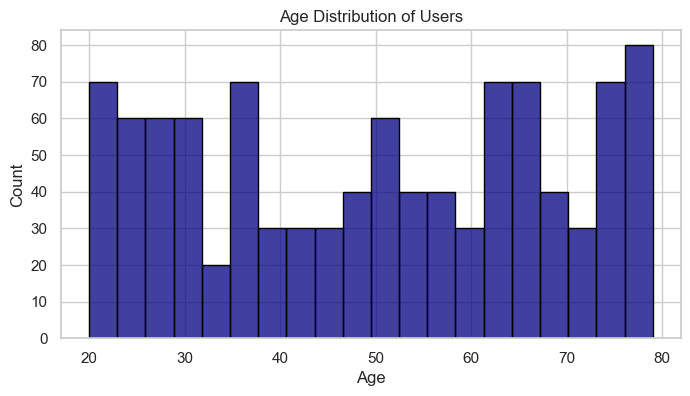

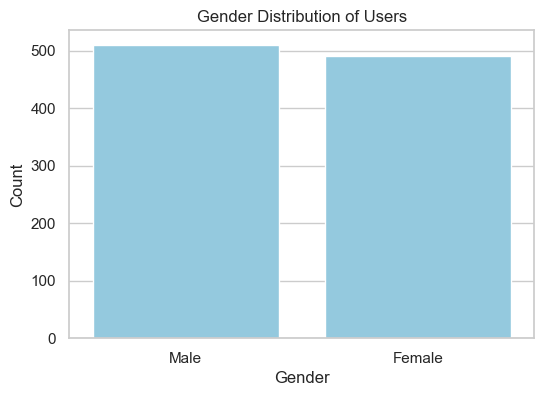

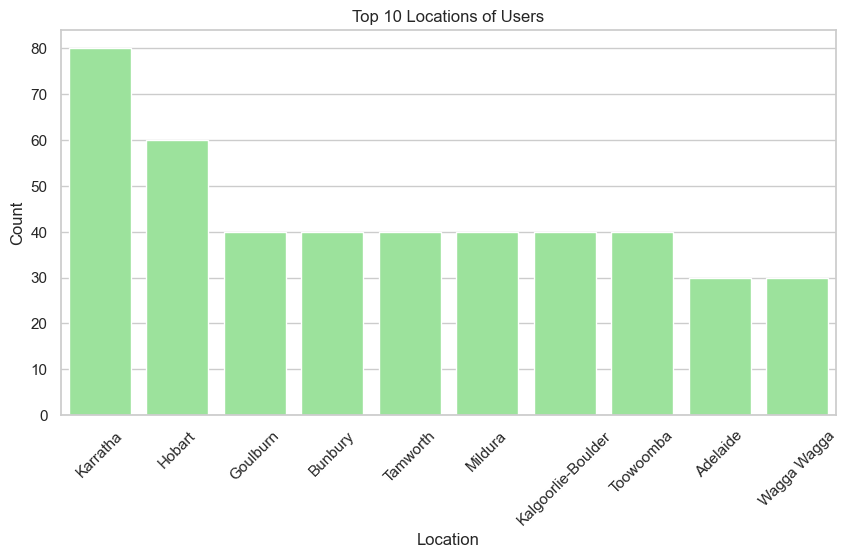

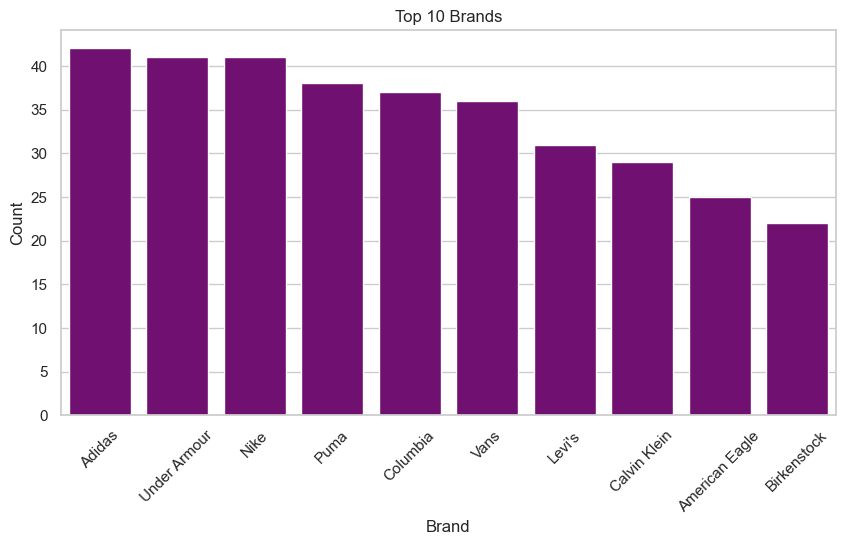

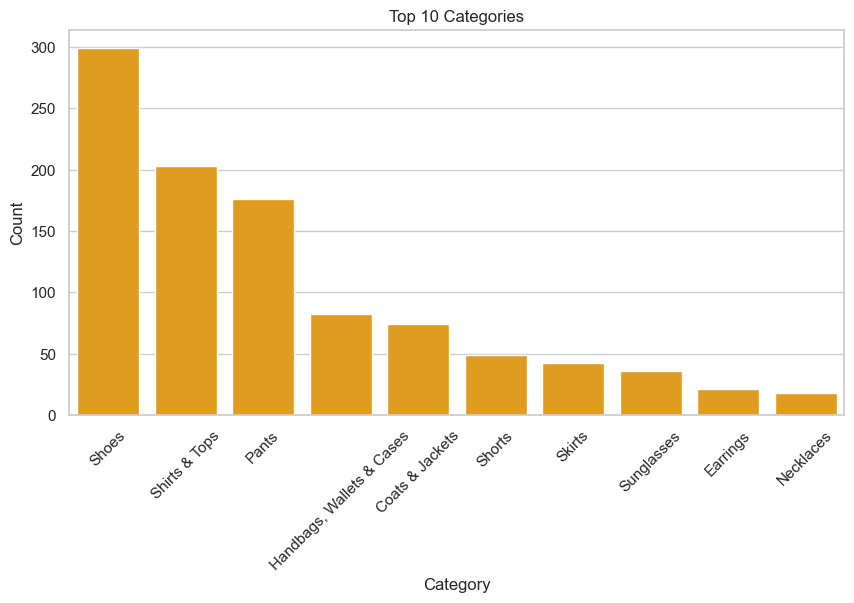

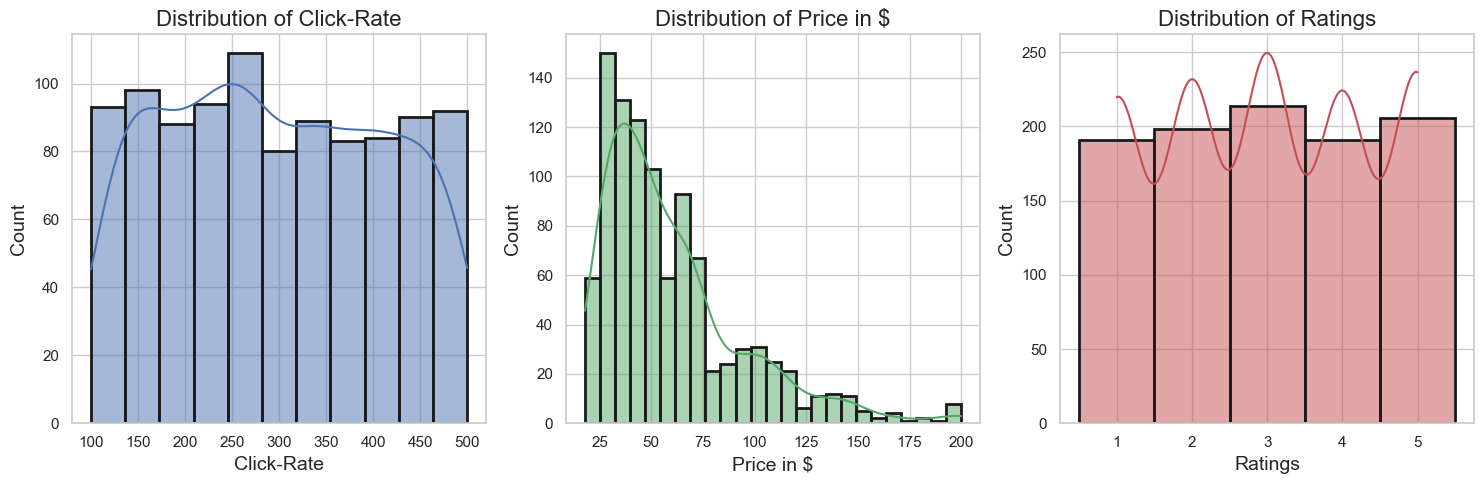

In [35]:
# Set the overall aesthetics for all plots
sns.set_theme(style="whitegrid")

# Create a figure to host the topplots
plt.figure(figsize=(15, 5))

# Distribution plot for Age Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['age'], bins=20, kde=False, color='navy', edgecolor='black')
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Distribution plot for Gender Distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_distribution.index, y=gender_distribution.values, color='skyblue')
plt.title('Gender Distribution of Users')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Distribution plot for Top 10 Locations
plt.figure(figsize=(10, 5))
sns.barplot(x=location_distribution.index, y=location_distribution.values, color='lightgreen')
plt.title('Top 10 Locations of Users')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Top 10 Brands
plt.figure(figsize=(10, 5))
brand_distribution = df['brand'].value_counts().head(10)
sns.barplot(x=brand_distribution.index, y=brand_distribution.values, color='purple')
plt.title('Top 10 Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Top 10 Categories
plt.figure(figsize=(10, 5))
category_distribution = df['category'].value_counts().head(10)
sns.barplot(x=category_distribution.index, y=category_distribution.values, color='orange')
plt.title('Top 10 Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Create a figure to host the sub-distribution plots
plt.figure(figsize=(15, 5))

# Distribution plot for click-rate
plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st subplot
sns.histplot(df['click_rate'], kde=True, color='b', edgecolor="k", linewidth=2)
plt.title('Distribution of Click-Rate', fontsize=16)
plt.xlabel('Click-Rate', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Distribution plot for price in $
plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd subplot
sns.histplot(df['price in $'], kde=True, color='g', edgecolor="k", linewidth=2)
plt.title('Distribution of Price in $', fontsize=16)
plt.xlabel('Price in $', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Distribution plot for ratings
plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd subplot
sns.histplot(df['ratings'], kde=True, color='r', edgecolor="k", linewidth=2, bins=5, discrete=True)
plt.title('Distribution of Ratings', fontsize=16)
plt.xlabel('Ratings', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks([1, 2, 3, 4, 5])  # Set x-axis to show integer values

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [36]:
# Calculate the mean and median of the "Price in $"
mean_price = df['price in $'].mean()
median_price = df['price in $'].median()

print("Mean of 'Price in $':", mean_price)
print("Median of 'Price in $':", median_price)

Mean of 'Price in $': 59.9035
Median of 'Price in $': 50.0


## Joint Distribution - relationship Price vs. Click Rate

This section creates a joint distribution plot to explore the relationship between the `price in $` and `click_rate` of items. The plot combines scatter plots with regression lines and histograms to visualize how these two variables correlate and their individual distributions.

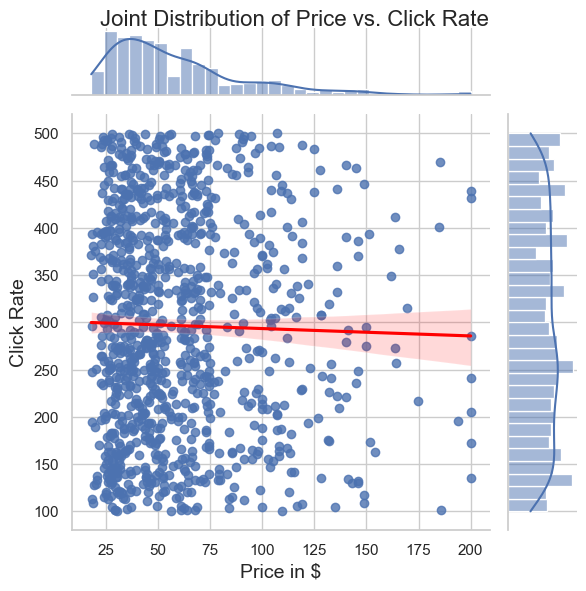

In [20]:
# Setting the theme
sns.set_theme(style="whitegrid")

# Creating the joint distribution plot
g = sns.jointplot(x='price in $', y='click_rate', data=df, kind='reg', color='b',
                  joint_kws={'line_kws':{'color':'red'}}, marginal_kws=dict(bins=30, fill=True))
g.fig.suptitle('Joint Distribution of Price vs. Click Rate', fontsize=16)
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.95)  # adjust the Figure in g
g.set_axis_labels('Price in $', 'Click Rate', fontsize=14)
plt.show()

## Categorical Features

This section of the notebook is dedicated to visualizing the distribution of categorical features in the dataset that meet a specific criterion for uniqueness.

                               Visualising Categorical Features:                                


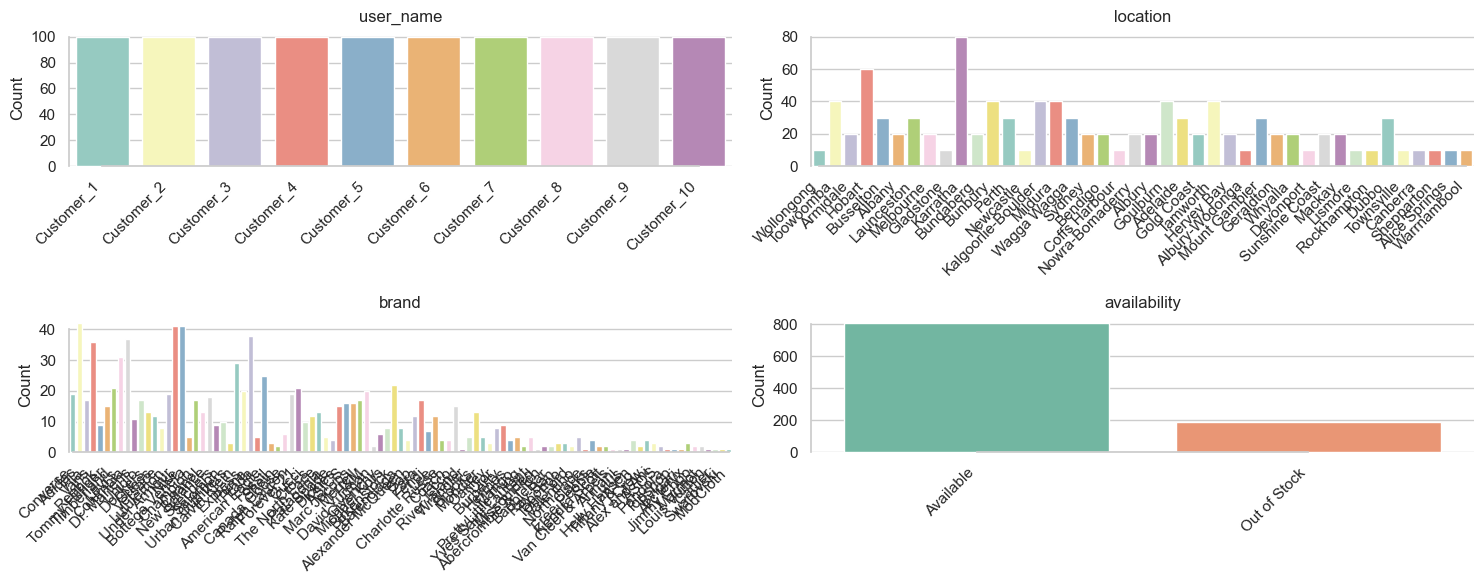

In [23]:
# Define categorical features based on a threshold for unique values
cf = [col for col in df.columns if df[col].nunique() <= 400 and df[col].dtype == 'object']

sns.set_theme(style="whitegrid")
print('\033[1mVisualising Categorical Features:'.center(100))

n = 2  # Number of columns in the subplot
rows = math.ceil(len(cf) / n)  # Calculate the required number of rows in the subplot
plt.figure(figsize=[15, 3 * rows])

for i, col in enumerate(cf):
    plt.subplot(rows, n, i + 1)
    if df[col].nunique() <= 8:
        sns.countplot(x=col, data=df, palette='Set2')
    else:
        sns.countplot(x=col, data=df, palette='Set3')
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha="right")

plt.subplots_adjust(hspace=0.4, wspace=0.4)
sns.despine(trim=True)
plt.tight_layout()
plt.show()

## Numeric Features

This section of the notebook is dedicated to visualizing the distribution of numeric features in the dataset including a whiskerplot that meet a specific criterion for uniqueness.

                                                Numeric Features Distribution                                                 


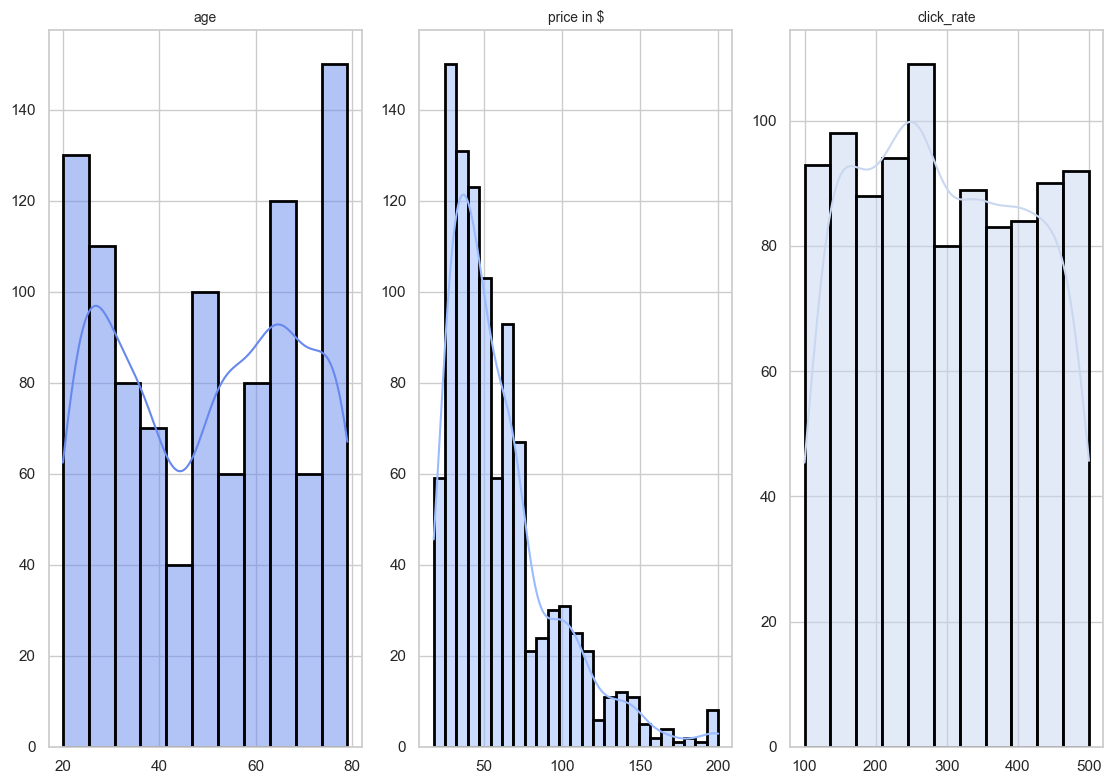

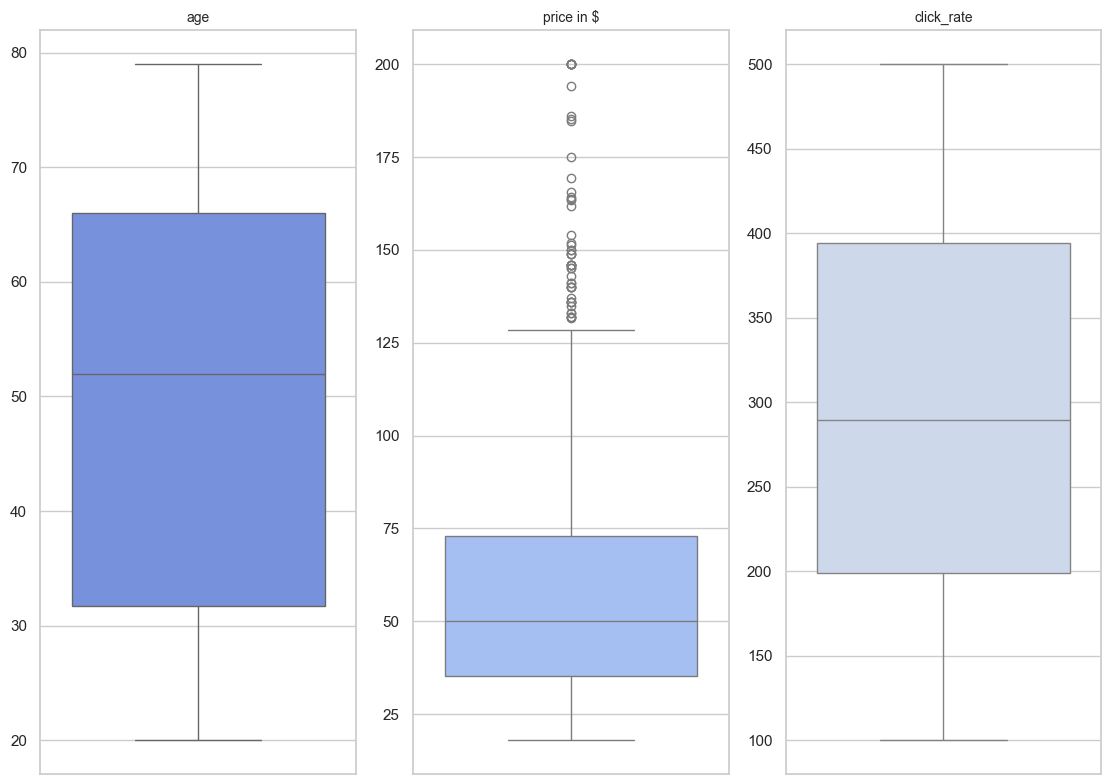

In [24]:
# Define numeric features based on a threshold for unique values
nf = [col for col in df.columns if df[col].dtype in ['int64', 'float64'] and df[col].nunique() > 45]

sns.set_theme(style="whitegrid")
print('\033[1mNumeric Features Distribution'.center(130))

# Number of columns in the subplot
n = 4
rows = math.ceil(len(nf) / n)  # Calculate the required number of rows in the subplot

# Distribution Plots
plt.figure(figsize=[15, 8 * rows])
for i, feature in enumerate(nf):
    plt.subplot(math.ceil(len(nf) / n), n, i + 1)
    sns.histplot(df[feature], kde=True, color=sns.color_palette("coolwarm")[i % len(sns.color_palette("coolwarm"))], edgecolor="black", linewidth=2)
    plt.title(feature, fontsize=10)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=[15, 8 * rows])
for i, feature in enumerate(nf):
    plt.subplot(math.ceil(len(nf) / n), n, i + 1)
    sns.boxplot(y=df[feature], color=sns.color_palette("coolwarm")[i % len(sns.color_palette("coolwarm"))])
    plt.title(feature, fontsize=10)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

# Summary of Key Insights

### User Demographics:
Age Distribution: Users range widely in age, with a significant concentration in the 20-30 and 65+ age group.<br>
Gender Distribution: The dataset has a fairly even gender distribution with a slight tilt towards males.<br>
Top Locations: The most active users come from many locations, with the top ones being Karratha, Hobart, Goulburn.

### Product Insights:
Popular Categories: Shoes, Shirts, and Pants dominate the fashion items.<br>
Top Brands: Brands like Adidas, Under Armor, and Nike are the top categories of the dataset.<br>
Price Range: The prices of fashion items vary significantly, with an mean of 59,9 dollar and the median of 50 dollar, but some outliers.<br>
Availability: Most items are available, with a smaller proportion marked as out of stock.

### Engagement Metrics:
Top Click Rates: Items from popular brands like Converse and Vans in categories such as Shoes receive high click rates.<br>
Price vs Click Rate Correlation: There is a moderate correlation between price and click rate, suggesting that higher-priced items may attract more clicks.
<br>
***

## Scatterplot

This section focuses on visualizing the pairwise relationships and distributions of numeric features in the dataset to understand their interactions and individual behaviors.

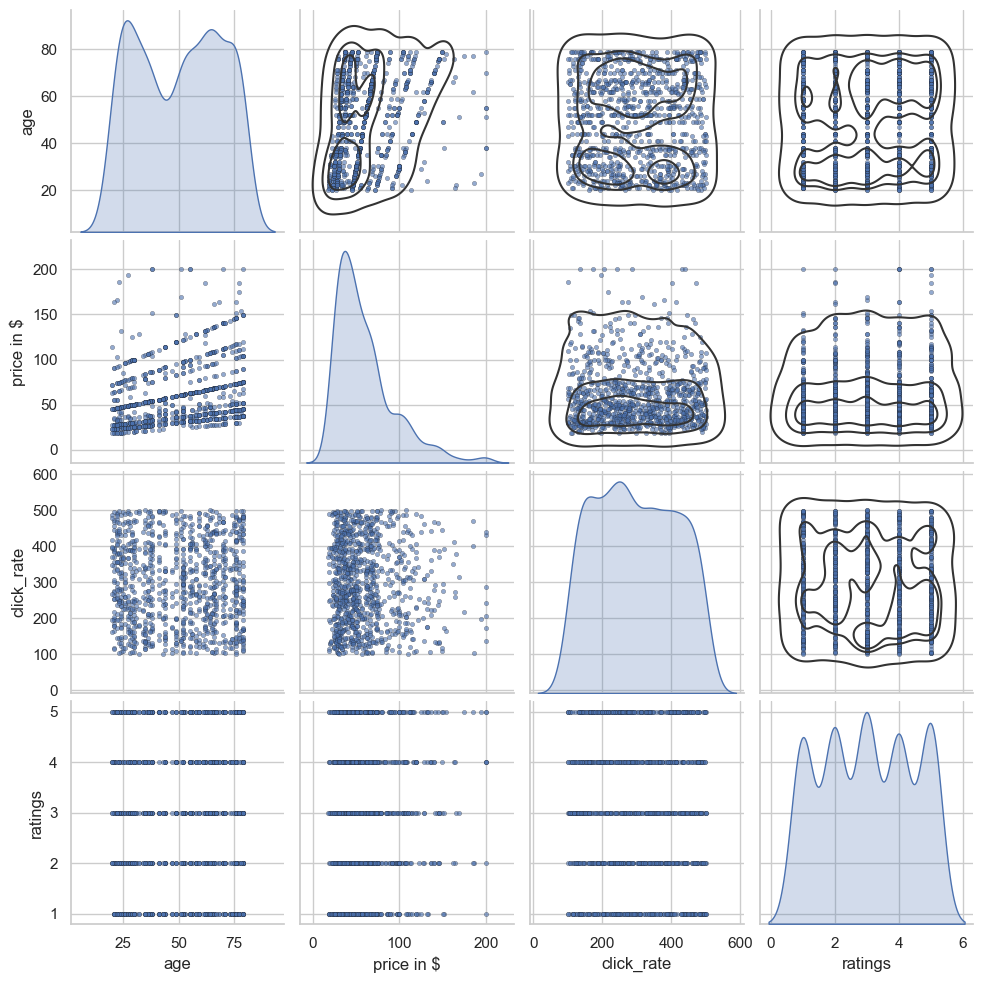

In [26]:
# Set the theme
sns.set_theme(style="whitegrid")

# Select numeric features only for the pairplot to ensure clarity and performance
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Create a pairplot for numeric features
g = sns.pairplot(df[numeric_cols], palette="coolwarm", diag_kind='kde', plot_kws={'alpha': 0.6, 's': 10, 'edgecolor': 'k'})

# Customize the upper triangle with KDE plots to see density
g.map_upper(sns.kdeplot, levels=4, color=".2")

# Save the plot as a PNG file
plt.savefig("Python_Scatterplot.png")
plt.show()

# Summary of Scatterplot insights

### Age vs. Click Rate:
This plot would likely show whether certain age groups are more engaged with fashion items. In fact there is no linear correlation found between Age and Click Rate


### Price vs. Click Rate:
There is a positive correlation on lower-priced items attract more clicks, indicating user interest in low price products.


### Ratings vs. Click Rate:
There's no  correlation which imply that factors other than ratings drive user engagement.


### Price vs. Ratings:
Cheaper items have significantly higher ratings, that might suggest that users prefer lower cost over higher costs.

### Age vs. Price:
The plot shows an age-related preferences in spending. Younger users significantly opt for less expensive items, while older users are willing to spend more on fashion.

***

# Data Preprocessing for using in RAG

## Search for Duplicates

In [29]:
counter = 0
rs,cs = original_df.shape

df.drop_duplicates(inplace=True)

if df.shape==(rs,cs):
    print('\n\033[1mResponse:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mResponse:\033[0m Number of duplicates dropped/fixed ---> {rs-df.shape[0]}')


Response: Number of duplicates dropped/fixed ---> 0


## Search for 0 values

In [30]:
nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df.shape[0],3)*100
print(nvc)

                           Total Null Values  Percentage
user_name                                  0         0.0
Skirts                                     0         0.0
Shorts                                     0         0.0
Shoes                                      0         0.0
Shirts & Tops                              0         0.0
Pants                                      0         0.0
Necklaces                                  0         0.0
Handbags, Wallets & Cases                  0         0.0
Earrings                                   0         0.0
Coats & Jackets                            0         0.0
Sunglasses                                 0         0.0
gender_male                                0         0.0
image_url                                  0         0.0
ratings                                    0         0.0
availability                               0         0.0
click_rate                                 0         0.0
price in $                     

## Converting categorical Columns to Numeric

This section of the notebook demonstrates the application of one-hot encoding to categorical features based on the presence of non-zero percentages of missing values, preparing the data for machine learning algorithms.

In [31]:
df3 = df.copy()

# Assuming 'nvc' is a DataFrame with columns 'Feature' and 'Percentage', and 'cf' is a list of categorical feature names
ecc = nvc[nvc['Percentage'] != 0].index.values  # Features with non-zero percentage to encode
fcc = [i for i in cf if i not in ecc]  # Final list of categorical features to encode

print("\033[1mOne-Hot Encoding applied on features:\033[0m")
for i in fcc:
    n_unique_values = df3[i].nunique()
    if n_unique_values == 2:
        print(i)
        # Apply one-hot encoding for binary features
        df3[i] = pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
    elif n_unique_values > 2:
        print(i)
        # Apply dummy encoding for features with more than two unique values
        # This will create multiple columns for the feature 'i' with prefix 'i'
        dummies = pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
        df3 = pd.concat([df3.drop([i], axis=1), dummies], axis=1)

print(df3.shape)


One-Hot Encoding applied on features:
user_name
location
brand
availability
(1000, 166)


## Final Dataset after Cleaning

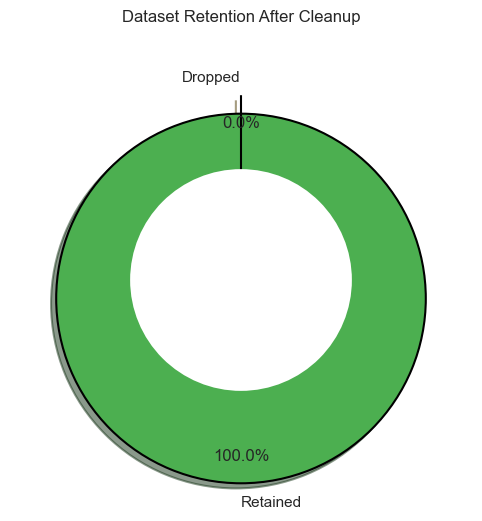


Inference: After the cleanup process, 0 samples were dropped, retaining 100.0% of the data.


In [33]:
# Assuming df is your cleaned dataframe and original_df is the original one
df1 = df3.copy()
df = df1.copy()
df.columns = [i.replace('-', '_') for i in df.columns]

# Improved color scheme and aesthetics
colors = ['#4CAF50', '#FFC107']  # Green for retained, yellow for dropped
explode = (0.1, 0)  # Slightly explode the first slice (Retained)

plt.figure(figsize=(8, 6))  # Increase the figure size for better readability
plt.pie([df.shape[0], original_df.shape[0] - df.shape[0]],
        labels=['Retained', 'Dropped'],
        counterclock=False,
        autopct='%1.1f%%',
        pctdistance=0.85,
        explode=explode,
        shadow=True,
        startangle=90,
        colors=colors,
        wedgeprops={"edgecolor": "0",'linewidth': 1.5, 'linestyle': 'solid', 'antialiased': True})

# Add a circle at the center to turn the pie into a donut chart
centre_circle = plt.Circle((0, 0), 0.6, color='black', fc='white', linewidth=0)
fig = plt.gcf()  # Get the current figure
fig.gca().add_artist(centre_circle)

plt.title('Dataset Retention After Cleanup', pad=20)
plt.show()

# Printing the inference with improved formatting
retained_samples = df.shape[0]
dropped_samples = original_df.shape[0] - df.shape[0]
retained_percentage = round((retained_samples * 100) / original_df.shape[0], 2)

print(f'\n\033[1mInference:\033[0m After the cleanup process, {dropped_samples} samples were dropped, \
retaining {retained_percentage}% of the data.')


# End of analysis

***